In [213]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud = pd.read_csv('stud_math.csv')

# Обработка данных

In [214]:
display(stud.head(15))
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Для удобста переменуем столбцы.

In [215]:
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [216]:
stud.columns = ['school', 'sex', 'age', 'address', 'fam_size', 'status', 'm_edu', 'f_edu',
       'm_job', 'f_job', 'reason', 'guardian', 'travel_time', 'study_time',
       'failures', 'school_sup', 'fam_sup', 'paid', 'activities', 'nursery',
       'study_time, granular', 'higher', 'internet', 'romantic', 'fam_rel',
       'free_time', 'go_out', 'health', 'absences', 'score']

Рассмотрим каждый столбец по отдельности.

# School
Посмотрим, сколько школ содержит датасет.

In [217]:
display(pd.DataFrame(stud.school.value_counts()))
stud.loc[:, ['school']].info()

,school
GP,349
MS,46


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Пропусков нет, но и школ только две.

Итог: 0 пустых строк, 2 уникальных значения.

# sex

In [218]:
display(pd.DataFrame(stud.sex.value_counts()))
stud.loc[:, ['sex']].info()

,sex
F,208
M,187


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Ну тут всё понятно. Пустых значений нет.

Итог: 0 пустых строк, 2 уникальных значения.

# age

А вот и первый числовой столбец. Посмотрим на его распределение:

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

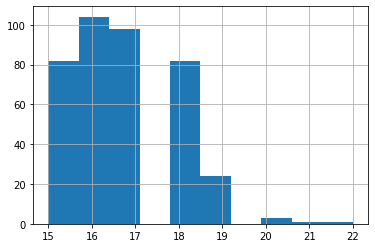

In [219]:
stud.age.hist()
stud.age.describe()

Можем заметить что большинство детей младше 19 и также присутствуют несколько постарше.

Итог: 0 пустых строк, выбросов нет.

# address

In [220]:
display(pd.DataFrame(stud.address.value_counts()))
stud.loc[:, ['address']].info()

,address
U,295
R,83


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Кол-во различныйх школ и кол-во различных адрессов совпадают. Но вот значения нет. Интересно.

Итог: 17 пустых строк, 2 уникальных значения.

# famsize

In [221]:
display(pd.DataFrame(stud.fam_size.value_counts()))
stud.loc[:, ['fam_size']].info()

,fam_size
GT3,261
LE3,107


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   fam_size  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Где цифры Билли? Нам нужны цифры... Извиняюсь. Тут ничего необычного

Итог: 27 пустых строк, 2 уникальных значения.

# Pstatus

In [57]:
display(pd.DataFrame(stud.status.value_counts()))
stud.loc[:, ['status']].info()

,status
T,314
A,36


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   status  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Всё отлично.

Итог: 45 пустых строк, 2 уникальных значения.

# Medu

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: m_edu, dtype: float64

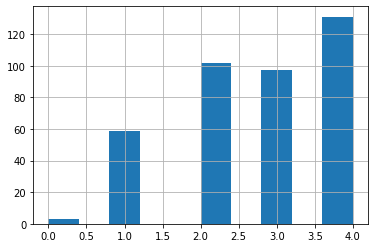

In [222]:
stud.m_edu.hist()
stud.m_edu.describe()

Ого сколько высших образований. Много однако образованных родителей. Это хорошо.

Итог: 3 пустые строки, выбросов нет.

# Fedu 

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: f_edu, dtype: float64

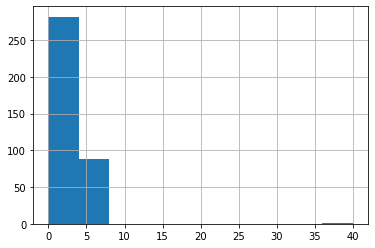

In [223]:
stud.f_edu.hist()
stud.f_edu.describe()

А вот и ошибка в данных. Изначально не может быть значения выше 4. Избавимся от этого.

count    370.000000
mean       2.513514
std        1.087540
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: f_edu, dtype: float64

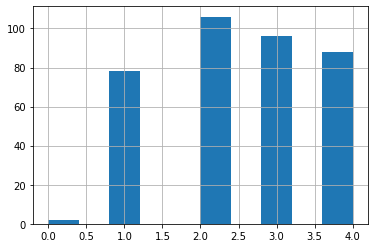

In [225]:
stud = stud.loc[stud.f_edu <= 4]
stud.f_edu.hist()
stud.f_edu.describe()

Теперь всё верно.

Итог: 24 пустые строки, присутствует ошибка в заполнении данных, выбросов нет.

# Mjob

In [226]:
display(pd.DataFrame(stud.m_job.value_counts()))
stud.loc[:, ['m_job']].info()

,m_job
other,125
services,90
at_home,57
teacher,48
health,31


<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   m_job   351 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


Итог: 19 пустых строк, 5 уникальных значения.

# Fjob 

In [228]:
display(pd.DataFrame(stud.f_job.value_counts()))
stud.loc[:, ['f_job']].info()

,f_job
other,189
services,94
teacher,26
at_home,14
health,13


<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f_job   336 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


Итог: 34 пустые строки, 5 уникальных значений.

# reason 

In [229]:
display(pd.DataFrame(stud.reason.value_counts()))
stud.loc[:, ['reason']].info()

,reason
course,128
reputation,98
home,96
other,32


<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  354 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


Видно школы выбирают в основном из-за образовательной программы, а потом уже смотрят на репутацию и близость к дому.

Итог: 16 пустых строк, 4 уникальных значения.

# guardian 

In [230]:
display(pd.DataFrame(stud.guardian.value_counts()))
stud.loc[:, ['guardian']].info()

,guardian
mother,236
father,78
other,26


<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  340 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


Итог: 30 пустых строк, 3 уникальных значения.

# traveltime 

count    345.000000
mean       1.449275
std        0.701664
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: travel_time, dtype: float64

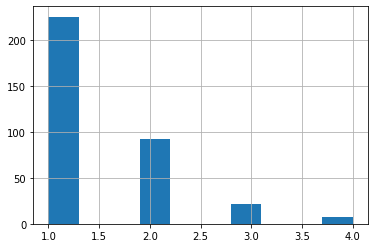

In [231]:
stud.travel_time.hist()
stud.travel_time.describe()

Итог: 25 пустых строк, выбросов нет.

# studytime 

count    363.000000
mean       2.027548
std        0.840489
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: study_time, dtype: float64

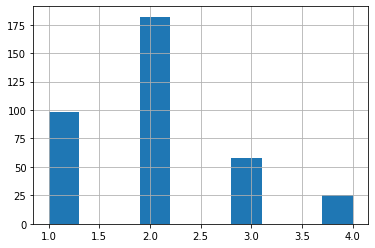

In [232]:
stud.study_time .hist()
stud.study_time.describe()

Итог: 7 пустых строк, выбросов нет.

# failures 

count    351.000000
mean       0.336182
std        0.748962
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

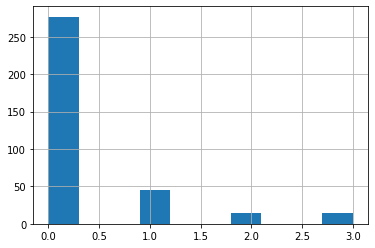

In [234]:
stud.failures .hist()
stud.failures.describe()

Итог: 19 пустых строк, выбросов нет.

# schoolsup 

In [235]:
display(pd.DataFrame(stud.school_sup.value_counts()))
stud.loc[:, ['school_sup']].info()

,school_sup
no,314
yes,47


<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school_sup  361 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


Итог: 9 пустых строк, 2 уникальных значения.

# famsup

In [236]:
display(pd.DataFrame(stud.fam_sup.value_counts()))
stud.loc[:, ['fam_sup']].info()

,fam_sup
yes,204
no,131


<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   fam_sup  335 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


Итог: 35 пустых строк, 2 уникальных значения.

# paid 

In [237]:
display(pd.DataFrame(stud.paid.value_counts()))
stud.loc[:, ['paid']].info()

,paid
no,188
yes,145


<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    333 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


Итог: 37 пустых строк, 2 уникальных значения.

# activities

In [238]:
display(pd.DataFrame(stud.paid.value_counts()))
stud.loc[:, ['paid']].info()

,paid
no,188
yes,145


<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    333 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


Кол-во внеучебных занятий и допов по математике совпадает. Возможно данные колонки полностью индентичны.
Проверим это.

In [241]:
stud[stud.activities == stud.paid].activities.count() == 370

False

Значит всё же они не индентичны. Оставляем всё как есть.

Итог: 37 пустых строк, 2 уникальных значения.

# nursery

In [240]:
display(pd.DataFrame(stud.nursery.value_counts()))
stud.loc[:, ['nursery']].info()

,nursery
yes,279
no,75


<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  354 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


Итог: 16 пустых строк, 2 уникальных значения.

# higher 

In [242]:
display(pd.DataFrame(stud.higher.value_counts()))
stud.loc[:, ['higher']].info()

,higher
yes,333
no,19


<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  352 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


Ого. Почти все хотят высшее образование.

Итог: 18 пустых строк, 2 уникальных значения.

# internet

In [244]:
display(pd.DataFrame(stud.internet.value_counts()))
stud.loc[:, ['internet']].info()

,internet
yes,283
no,54


<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  337 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


Итог: 33 пустые строки, 2 уникальных значения.

# romantic

In [245]:
display(pd.DataFrame(stud.romantic.value_counts()))
stud.loc[:, ['romantic']].info()

,romantic
no,226
yes,116


<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  342 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


Итог: 28 пустых строк, 2 уникальных значения.

# famrel

count    346.000000
mean       3.936416
std        0.939629
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: fam_rel, dtype: float64

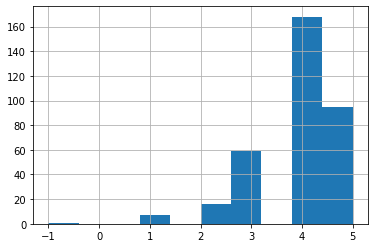

In [246]:
stud.fam_rel .hist()
stud.fam_rel.describe()

А вот и ещё одна ошибка. Значения не могут быть меньше единицы. Убираем.

count    345.000000
mean       3.950725
std        0.902455
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: fam_rel, dtype: float64

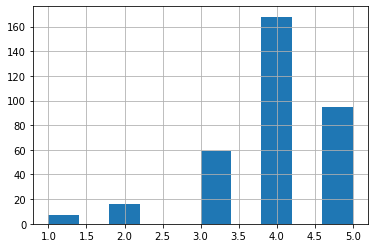

In [247]:
stud = stud.loc[stud.fam_rel >= 1]
stud.fam_rel.hist()
stud.fam_rel.describe()

Вот теперь всё верно.

Итог: 24 пустые строки, пристствует ошибка в заполнении данных, выбросов нет.

# freetime

count    336.000000
mean       3.229167
std        1.003508
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: free_time, dtype: float64

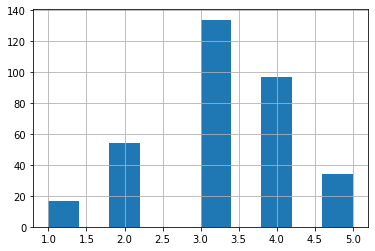

In [248]:
stud.free_time .hist()
stud.free_time.describe()

У большинства вполне неплохое кол-во свободного времени.

Итог: 9 пыстых строк, выбросов нет.

# goout 

count    337.000000
mean       3.106825
std        1.104852
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: go_out, dtype: float64

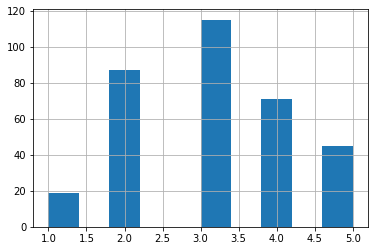

In [250]:
stud.go_out .hist()
stud.go_out.describe()

Итог: 8 пыстых строк, выбросов нет.

# health 

count    332.000000
mean       3.469880
std        1.386925
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

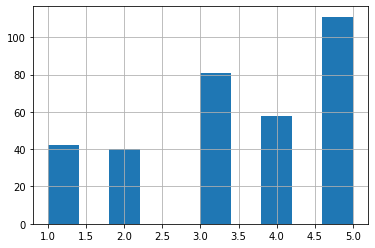

In [251]:
stud.health .hist()
stud.health.describe()

Итог: 13 пыстых строк, выбросов нет.

# absences

count    333.000000
mean       7.315315
std       24.755302
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

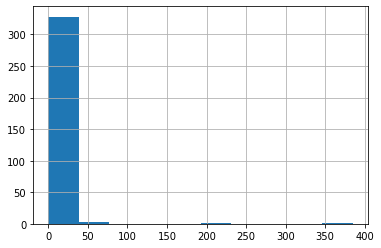

In [252]:
stud.absences .hist()
stud.absences.describe()

Вот и потенциальные выбросы. Проверим формулой межквартильного размаха.

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


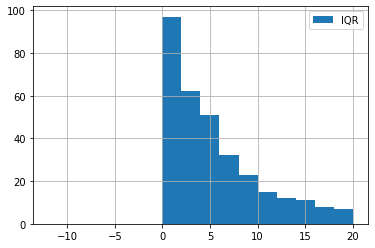

In [253]:
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)

print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud.absences.loc[stud.absences.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 16, range = (-12, 20), label = 'IQR')
 
plt.legend();

Отфильтруем данные.

In [254]:
stud = stud.loc[stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

Итог: 12 пыстых строк, присутствуют выбросы.

# score 
Последний и самый важный столбец.

count    313.000000
mean      52.124601
std       22.511546
min        0.000000
25%       45.000000
50%       55.000000
75%       65.000000
max      100.000000
Name: score, dtype: float64

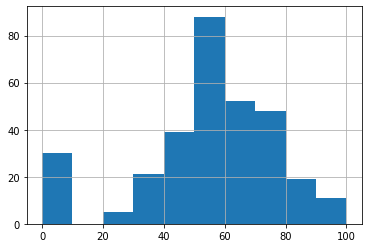

In [255]:
stud.score .hist()
stud.score.describe()

Здесь всё в порядке.

Итог: 0 пустых строк, выбросов нет.

# Корреляционный анализ

Выясним, какие столбцы коррелируют с баллами за госэкзамен по математике. Рассмотрим для начала только для числовых столбцов.

Граффиков получается слишком много поэтому построим тепловую карту, чтобы было проще найти коррелирующие столбцы. Для наглядности используем матрицу корреляций.

In [256]:
stud.corr()

,age,m_edu,f_edu,travel_time,study_time,failures,"study_time, granular",fam_rel,free_time,go_out,health,absences,score
age,1.000000,-0.176250,-0.193469,0.073914,-0.015188,0.219710,0.015188,0.058482,0.045144,0.097906,-0.061147,0.138921,-0.152937
m_edu,-0.176250,1.000000,0.647425,-0.188525,0.096564,-0.242613,-0.096564,-0.034579,0.006825,0.056204,-0.079287,0.102861,0.198240
f_edu,-0.193469,0.647425,1.000000,-0.193201,0.003729,-0.281114,-0.003729,-0.040042,-0.018485,0.011471,0.007139,-0.009144,0.114211
travel_time,0.073914,-0.188525,-0.193201,1.000000,-0.109333,0.083311,0.109333,-0.051752,0.009835,0.004574,-0.011856,-0.053176,-0.067642
study_time,-0.015188,0.096564,0.003729,-0.109333,1.000000,-0.143829,-1.000000,0.018273,-0.141048,-0.048134,-0.102211,-0.069378,0.119395
failures,0.219710,-0.242613,-0.281114,0.083311,-0.143829,1.000000,0.143829,0.031704,0.117818,0.084852,0.067415,0.059202,-0.311995
"study_time, granular",0.015188,-0.096564,-0.003729,0.109333,-1.000000,0.143829,1.000000,-0.018273,0.141048,0.048134,0.102211,0.069378,-0.119395
fam_rel,0.058482,-0.034579,-0.040042,-0.051752,0.018273,0.031704,-0.018273,1.000000,0.169739,0.092249,0.096186,-0.061762,0.045598
free_time,0.045144,0.006825,-0.018485,0.009835,-0.141048,0.117818,0.141048,0.169739,1.000000,0.283708,0.074485,0.100271,0.042375
go_out,0.097906,0.056204,0.011471,0.004574,-0.048134,0.084852,0.048134,0.092249,0.283708,1.000000,-0.008117,0.061950,-0.127803


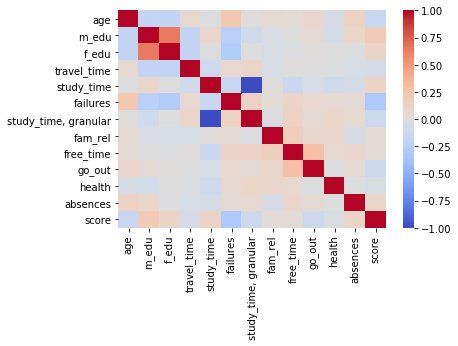

In [257]:
sns.heatmap(stud.corr(), annot = False, cmap = 'coolwarm')

Посмотрев на тепловую карту можно сделать некоторые выводы:

1)Чем больше возраст тем хуже ученик сдает экзамен;

2)Высокообразованные родители частично влияют на успеваемость их детей;

3)Из-за долго пути до школы ученики возможно устают и хуже пишут экзамен;

4)Время затраченное на учёбу дома положительно влиет на детей;

5)Кол-во внеучебных неудач негативно сказывается на успеваемости;

6)Отношение семьи, свободное время и текущее состояние здоровья практически никак не влияют на успеваемость(только если совсем чуть чуть(первые два положительно, а последнее отрицательно));

7)Постоянные прогулки на улице негативно сказываются на успеваемость, что необычно. Возможно из-за прогулок дети меньше уделяют времени учёбе;

8)И наконец самое странное это то как кол-во пропущенных занятий положительно сказывается на успеваемость.

Из них оставим самы значемые и логичные. А точнее мы оставим: age, m_edu, study_time, failures. f_edu Убираем, так как m_edu и f_edu сильно скоррелированны и один из них будет лишним.

Теперь взглянем на номинативные переменные.

In [258]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (8, 4))
    sns.boxplot(x=column, y='score', 
                data=stud,
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

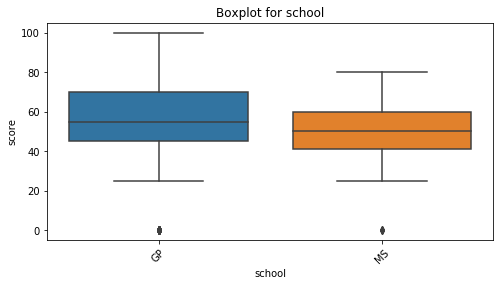

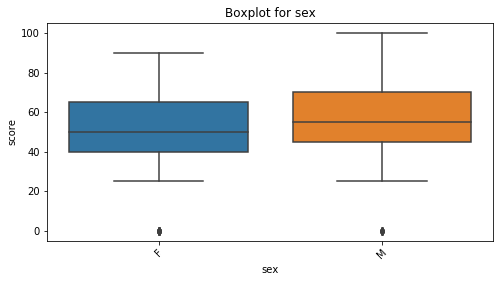

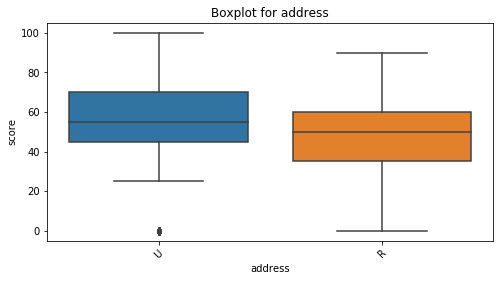

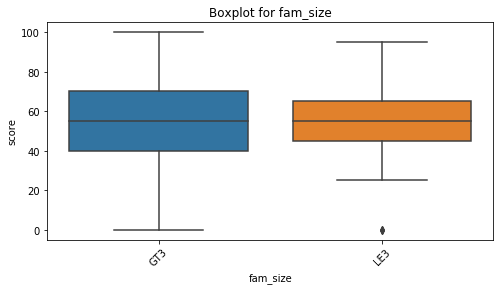

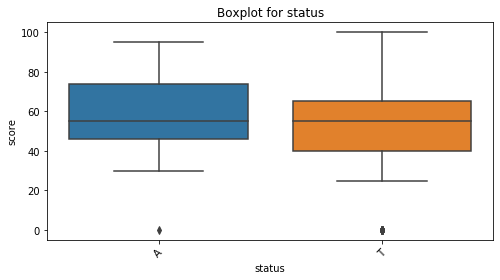

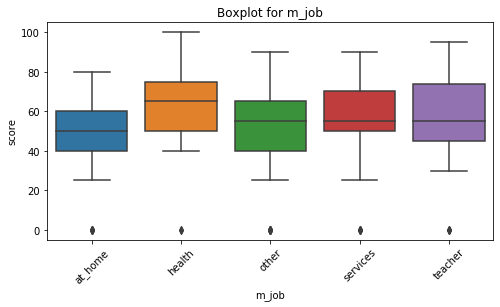

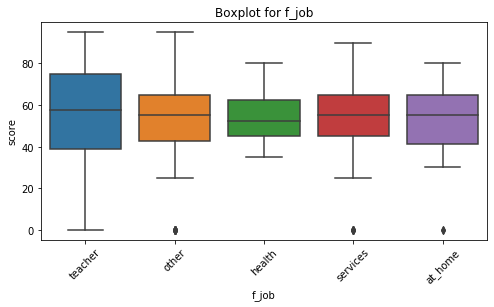

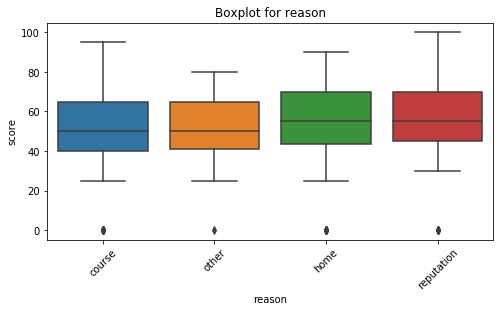

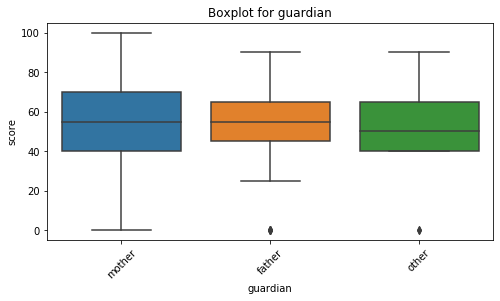

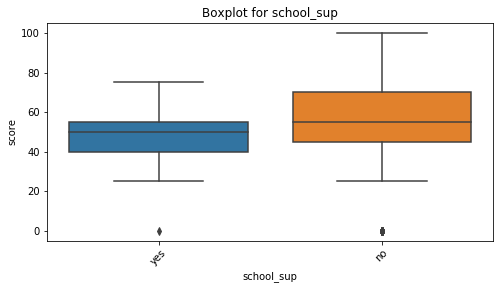

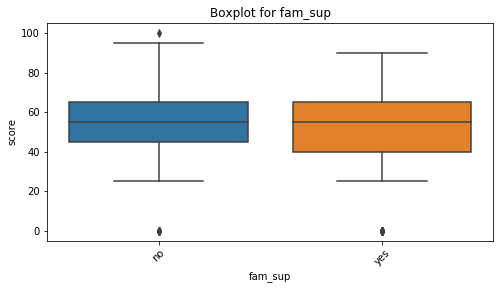

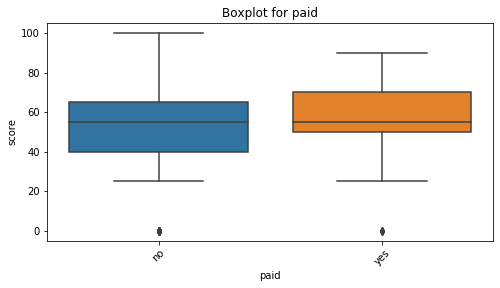

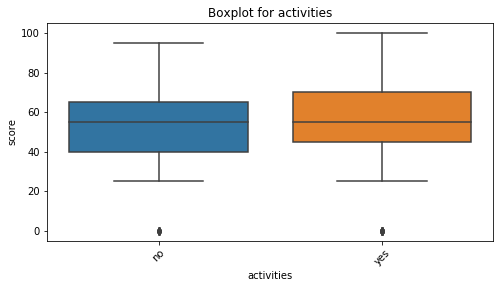

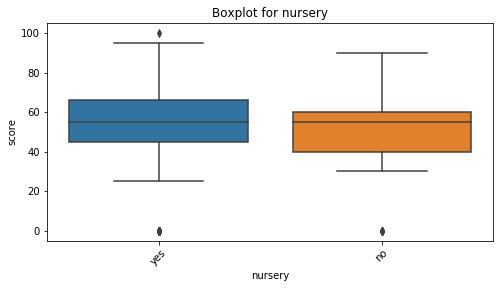

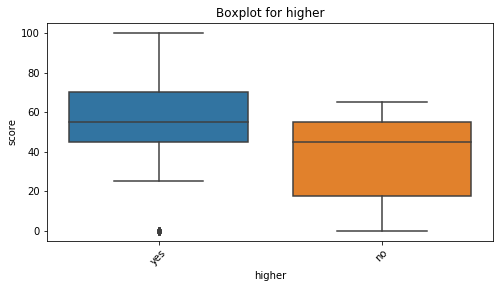

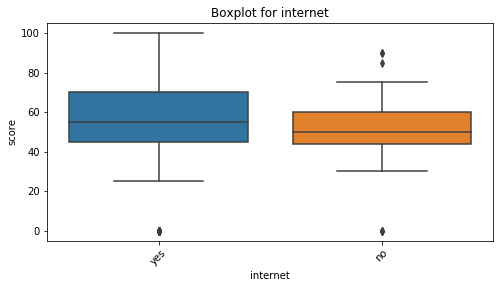

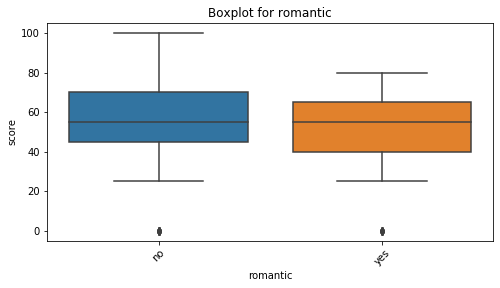

In [259]:
for col in ['school', 'sex', 'address', 'fam_size', 'status', 'm_job', 'f_job', \
'reason', 'guardian', 'school_sup', 'fam_sup', 'paid', 'activities', 'nursery', \
'higher', 'internet', 'romantic']:
    get_boxplot(col)

По графикам похоже, что все параметры могут влиять на успеваемость ученика. Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента.

In [264]:
def stud_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:5]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'],
                     stud.loc[stud.loc[:, column] == comb[1], 'score'], nan_policy='omit').pvalue \
                <= 0.05/len(combinations_all):
            print('Найдены статистически значимые различия для колонки', column)
            break

In [265]:
for col in ['school', 'sex', 'address', 'fam_size', 'status', 'm_job', 'f_job', \
'reason', 'guardian', 'school_sup', 'fam_sup', 'paid', 'activities', 'nursery', \
'higher', 'internet', 'romantic']:
    stud_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher


Как мы видим, серьёзно отличаются три параметра: address, paid, higher. Оставим эти переменные в датасете для дальнейшего посторения можели.

Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: address, paid, higher, age, m_edu, study_time, failures.

# Вывод

Настало время подвести выводы.

Итак, в результате EDA для анализа влияния параметров детей на балл за госэкзамен по математике были получены следующие выводы:

- В данных достаточно много пустых значений(почти 1/4 от всей даты).
- Выбросы найдены только в столбце с количеством пропущенных занятий. А также присутствуют ошибки в заполнении столбцов о семейных отношениях и об образовании отцов. Это позволяет сделать вывод о том, что данные достаточно чистые.
- Достаточно много параметров которые могут по своему влиять на итоговый балл ученика, но только некоторые из них наиболее значемые.
- Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это address, paid, higher, age, m_edu, study_time, failures.
